# Import important liberary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json 
import requests
from bs4 import BeautifulSoup

# Gathering Data
- **twitter_archive_enhanced.csv**
- **image_predictions.tsv**
- **tweet_json.txt**

In [2]:
tw = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
img = pd.read_csv('image-predictions.tsv', sep='\t' )

In [4]:
tweet_json=pd.read_json('tweet-json.txt',lines=True)

In [5]:
twj=tweet_json[['id_str','favorite_count','retweet_count']].copy()

# Assessing
- **Detect and document at least eight (8) quality issues and two (2) tidiness issues**  

In [6]:
tw

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
tw.iloc[0]['source']

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [9]:
tw.iloc[5]['text']

"Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh"

In [10]:
tw.iloc[4]['expanded_urls']

'https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1'

In [11]:
tw['expanded_urls'].isnull().sum()

59

In [12]:
print(tw['doggo'].unique())
print(tw['floofer'].unique())
print(tw['pupper'].unique())
print(tw['puppo'].unique())

['None' 'doggo']
['None' 'floofer']
['None' 'pupper']
['None' 'puppo']


In [13]:
state=(tw['doggo']+' '+tw['floofer']+' '+tw['pupper']+' '+tw['puppo']).unique()
for i in state:
    print(i.split(' '))

['None', 'None', 'None', 'None']
['doggo', 'None', 'None', 'None']
['None', 'None', 'None', 'puppo']
['None', 'None', 'pupper', 'None']
['None', 'floofer', 'None', 'None']
['doggo', 'None', 'None', 'puppo']
['doggo', 'floofer', 'None', 'None']
['doggo', 'None', 'pupper', 'None']


In [14]:
tw[(tw.doggo=='doggo')&
    ((tw.puppo=='puppo')|(tw.floofer=='floofer')|(tw.pupper=='pupper'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


In [15]:
tw.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
ar=tw['text'].str.extract(r'(\d\d?\.?\d?\d?/[1][0])')
ar.columns=['a']
ar['a'].value_counts()

12/10       558
11/10       464
10/10       462
13/10       353
9/10        157
8/10        102
14/10        56
7/10         53
5/10         35
6/10         32
3/10         19
4/10         15
2/10          9
1/10          8
420/10        2
15/10         2
9.75/10       2
0/10          2
17/10         1
11.26/10      1
182/10        1
007/10        1
13.5/10       1
9.5/10        1
666/10        1
1776/10       1
11.27/10      1
Name: a, dtype: int64

In [17]:
tw.rating_numerator.isnull().sum()

0

In [18]:
tw.rating_denominator.isnull().sum()

0

In [19]:
tw.tweet_id.duplicated().sum()

0

In [20]:
tw.timestamp.duplicated().sum()

0

In [21]:
img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [22]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
img.iloc[15]['jpg_url']

'https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg'

In [25]:
img.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [26]:
img[img.img_num==4]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True
1024,710588934686908417,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True
1161,734787690684657664,https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg,4,golden_retriever,0.883991,True,chow,0.023542,True,Labrador_retriever,0.016056,True
1286,750868782890057730,https://pbs.twimg.com/media/CmufLLsXYAAsU0r.jpg,4,toy_poodle,0.912648,True,miniature_poodle,0.035059,True,seat_belt,0.026376,False
1325,756998049151549440,https://pbs.twimg.com/media/CoFlsGAWgAA2YeV.jpg,4,golden_retriever,0.678555,True,Labrador_retriever,0.072632,True,Border_terrier,0.049033,True
1337,758405701903519748,https://pbs.twimg.com/media/CoZl9fXWgAMox0n.jpg,4,Chesapeake_Bay_retriever,0.702954,True,laptop,0.092277,False,notebook,0.032727,False
1342,758854675097526272,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,4,barrow,0.974047,False,Old_English_sheepdog,0.023791,True,komondor,0.001246,True
1372,762464539388485633,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,4,chow,0.999953,True,Tibetan_mastiff,0.000023,True,dhole,0.000003,False
1437,773985732834758656,https://pbs.twimg.com/media/Cr2_6R8WAAAUMtc.jpg,4,giant_panda,0.451149,False,fur_coat,0.148001,False,pug,0.109570,True


In [27]:
img.groupby(['p1_dog', 'p2_dog' , 'p3_dog']).tweet_id.count().sort_values(ascending=False)

p1_dog  p2_dog  p3_dog
True    True    True      1243
False   False   False      324
True    True    False      155
False   True    True       101
True    False   True        91
False   False   True        64
        True    False       54
True    False   False       43
Name: tweet_id, dtype: int64

In [28]:
twj.head(33)

,id_str,favorite_count,retweet_count
0,892420643555336192,39467,8853
1,892177421306343424,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991424,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198848,32467,7711


In [29]:
twj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id_str            2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [30]:
twj.describe()

,id_str,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


## Assessment document summary

### Quality

#### twitter-archive-enhanced.csv
- Missing value in expanded_urls
- Duplicated value in expanded_urls when we have more then photo in tweet
- tweet_id shold be  **string not float** becuse we didn't make any calc on it 
- timestamp and retweeted_status_timestamp **is datetime not object**
- rating_numerator have decimal value in text ignore in column 
- rating_denominator some time not equal 10
- Malti state for one dog (doggo and puppo) 1 record (doggo and floofer) 1 record (doggo and pupper) 12 record


### Tidiness
#### twitter-archive-enhanced.csv
- Erroneous datatypes for this (doggo, floofer, pupper and puppo) 
### image-predictions.tsv.csv
- img_num belong to twitter-archive not image prediction and related to expanded_urls to display all photo in tweet
- Erroneous datatypes
    - p1, p2 and p3
    - p1_conf, p2_conf and p3_conf
    - p1_dog, p2_dog and p3_dog
### tweet-json.txt
- favorite_count and retweet_count belong to twitter-archive 

# Cleaning
- **The result should be a high quality and tidy master pandas DataFrame**
- **Store cleaned data in twitter_archive_master.csv**

### Make a copy of data

In [31]:
tw_c=tw.copy()
img_c=img.copy()
twj_c=twj.copy()

### Remove any retweet or reply and drop unusing col

In [33]:
tw_c=tw_c.drop(tw_c[(tw_c['in_reply_to_status_id'].notnull()) | tw_c['retweeted_status_id'].notnull()].index)
tw_c.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

### *Define*
- **Missing value in expanded_urls**
- **Duplicated value in expanded_urls when we have more then photo in tweet**
    - complate the missing value in expanded_urls and remove duplicate by recalculate the URL using concat https://twitter.com/dog_rates/status/ + tweet_id

### *Code*

In [34]:
tw_c['expanded_urls']='https://twitter.com/dog_rates/status/' + tw_c['tweet_id'].astype(str)

### *Test*

In [35]:
tw_c[(tw_c['expanded_urls'].isnull()) | (tw_c['expanded_urls'].str.contains(','))]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### *Define*
- **tweet_id should be string not float**
    - convert to string
- **timestamp should be datetime not object**
    - convert to datetime

### *Code*

In [36]:
tw_c['tweet_id']=tw_c['tweet_id'].astype(str)
tw_c['timestamp']=pd.to_datetime(tw_c['timestamp'])

### *Test*

In [37]:
tw_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 213.0+ KB


### *Define*
- **rating_denominator some time not equal 10**
    - drop tweet without rating count 15 record
    - Extract from text again
    - Convert to decimal
- **rating_numerator have decimal value in text ignore in column**
    - Extract from text again
    - Convert to decimal

### *Code*

In [38]:
tw_c['rating_numerator']=tw_c['rating_numerator'].astype(float)
tw_c['rating_denominator']=tw_c['rating_denominator'].astype(float)

In [39]:
rate=tw_c['text'].str.extract(r'(\d\d?\.?\d?\d?/[1][0])')
rate.columns=['r']
index_null=rate[rate['r'].isnull()].index
tw_c.drop(index_null,inplace=True)
tw_c['rating_numerator']=rate['r'].str.split('/').str[0]
tw_c['rating_denominator']=rate['r'].str.split('/').str[1]
tw_c['rating_numerator']=tw_c['rating_numerator'].astype(float)
tw_c['rating_denominator']=tw_c['rating_denominator'].astype(float)

### *Test*

In [40]:
tw_c['rating_numerator'].unique()

array([1.300e+01, 1.200e+01, 1.400e+01, 1.350e+01, 1.100e+01, 6.000e+00,
       1.000e+01, 0.000e+00, 9.750e+00, 5.000e+00, 1.127e+01, 3.000e+00,
       7.000e+00, 8.000e+00, 9.000e+00, 4.000e+00, 1.776e+03, 1.126e+01,
       2.000e+00, 1.000e+00, 4.200e+02])

In [41]:
tw_c['rating_denominator'].unique()

array([10.])

In [42]:
tw_c['rating_numerator'].sample(10)

1173    10.0
2301    12.0
110     14.0
1461     5.0
167     13.0
2090     8.0
1334    11.0
508     13.0
2183     3.0
738     11.0
Name: rating_numerator, dtype: float64

### *Define*
- **Malti record state (doggo and puppo) 1 record (doggo and floofer) 1 record (doggo and pupper) 12 record**
    - drop all misclassfied

In [43]:
tw_c.shape

(2085, 12)

### *Code*

In [44]:
tw_c.drop(tw_c[(tw_c.doggo=='doggo')&
    ((tw_c.puppo=='puppo')|(tw_c.floofer=='floofer')|(tw_c.pupper=='pupper'))].index,inplace=True)

### *Test*

In [45]:
tw_c.shape

(2074, 12)

### *Define*
- **Erroneous datatypes for this (doggo, floofer, pupper and puppo)**
    - rearange this variable to one variable with value using melt

### *Code*

In [46]:
tw_c=pd.melt(tw_c, id_vars=['tweet_id','timestamp','source','text','expanded_urls',
                            'rating_numerator','rating_denominator','name'],
             value_vars=['doggo','floofer','pupper','puppo'],
                           var_name='dogs', value_name='stage')
del tw_c['dogs']

In [47]:
tw_c=tw_c.sort_values('stage').drop_duplicates(subset='tweet_id',keep='last')

### *Test*

In [48]:
tw_c['stage'].value_counts()

None       1749
pupper      221
doggo        72
puppo        23
floofer       9
Name: stage, dtype: int64

In [49]:
tw_c.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
1991,667491009379606528,2015-11-19 23:53:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7.0,10.0,None,None
1990,667495797102141441,2015-11-20 00:12:54+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9.0,10.0,Philippe,None
1989,667502640335572993,2015-11-20 00:40:05+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,11.0,10.0,Hall,None
1988,667509364010450944,2015-11-20 01:06:48+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This a Norwegian Pewterschmidt named Tickles. ...,https://twitter.com/dog_rates/status/667509364...,12.0,10.0,None,None
1987,667517642048163840,2015-11-20 01:39:42+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Dook &amp; Milo. Dook is struggling to...,https://twitter.com/dog_rates/status/667517642...,8.0,10.0,Dook,None


### *Define*
- **img_c convert tweet_id to string**

### *Code*

In [50]:
img_c['tweet_id']=img_c['tweet_id'].astype(str)

### *Test*

In [51]:
img_c.tweet_id.dtype

dtype('O')

### *Define*
- **Erroneous datatypes**
    - p1, p2 and p3
    - p1_conf, p2_conf and p3_conf
    - p1_dog, p2_dog and p3_dog

### *Code*

In [52]:
img_c.shape

(2075, 12)

In [53]:
img_c=pd.melt(img_c, id_vars=['tweet_id','jpg_url','img_num','p1_conf','p1_dog','p2_conf','p2_dog','p3_conf','p3_dog'],
        value_vars=['p1','p2','p3'],
        var_name='p', value_name='dog_type')
img_c=pd.melt(img_c,id_vars=['tweet_id','jpg_url','img_num','p1_dog','p2_dog','p3_dog','p','dog_type'],
        value_vars=['p1_conf','p2_conf','p3_conf'],
        var_name='p_conf', value_name='conf_value')
img_c=pd.melt(img_c,id_vars=['tweet_id','jpg_url','img_num','p','dog_type','p_conf','conf_value'],
        value_vars=['p1_dog','p2_dog','p3_dog'],
        var_name='p_dog', value_name='is_dog')
img_c

,tweet_id,jpg_url,img_num,p,dog_type,p_conf,conf_value,p_dog,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel,p1_conf,0.465074,p1_dog,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone,p1_conf,0.506826,p1_dog,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1,German_shepherd,p1_conf,0.596461,p1_dog,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,p1,Rhodesian_ridgeback,p1_conf,0.408143,p1_dog,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,p1,miniature_pinscher,p1_conf,0.560311,p1_dog,True
...,...,...,...,...,...,...,...,...,...
56020,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,p3,German_short-haired_pointer,p3_conf,0.175219,p3_dog,True
56021,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,p3,spatula,p3_conf,0.040836,p3_dog,False
56022,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,p3,kelpie,p3_conf,0.031379,p3_dog,True
56023,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,p3,papillon,p3_conf,0.068957,p3_dog,True


In [54]:
img_c.drop_duplicates(subset=['tweet_id','p'],inplace=True)
del img_c['p_conf']
del img_c['p_dog']

### *Test*
** Must by 2075 x 3=6225

In [55]:
img_c.shape

(6225, 7)

In [56]:
img_c.head(3)

,tweet_id,jpg_url,img_num,p,dog_type,conf_value,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1,German_shepherd,0.596461,True


### *Define*
- Rearrang Tables to be two tables as "Each type of obs. unit forms atable"

### *Code*

In [57]:
tw_c.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
1991,667491009379606528,2015-11-19 23:53:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7.0,10.0,None,None


In [58]:
img.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [59]:
twj_c.head(1)

,id_str,favorite_count,retweet_count
0,892420643555336192,39467,8853


In [60]:
twj_c['id_str']=twj_c['id_str'].astype(str)
tw_c=tw_c.merge(twj_c,left_on='tweet_id', right_on='id_str',how='left')
del tw_c['id_str']

In [61]:
img['tweet_id']=img['tweet_id'].astype(str)
tw_c=tw_c.merge(img,on='tweet_id',how='left')
tw_c.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1,inplace=True)

In [62]:
tw_c.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num'],
      dtype='object')

In [63]:
tw_c=tw_c[['tweet_id','timestamp','text','name','stage',
              'favorite_count','retweet_count','rating_numerator','rating_denominator','source',
              'expanded_urls','img_num','jpg_url']]

In [64]:
img_c.drop(['jpg_url','img_num'], axis=1,inplace=True)

### *Test*

In [65]:
tw_c.head(2)

,tweet_id,timestamp,text,name,stage,favorite_count,retweet_count,rating_numerator,rating_denominator,source,expanded_urls,img_num,jpg_url
0,667491009379606528,2015-11-19 23:53:52+00:00,Two dogs in this one. Both are rare Jujitsu Py...,None,None,559.0,242.0,7.0,10.0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",https://twitter.com/dog_rates/status/667491009...,1.0,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg
1,667495797102141441,2015-11-20 00:12:54+00:00,This is Philippe from Soviet Russia. Commandin...,Philippe,None,NaN,NaN,9.0,10.0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",https://twitter.com/dog_rates/status/667495797...,1.0,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg


In [66]:
tw_c.shape

(2074, 13)

In [67]:
img_c.head(3)

,tweet_id,p,dog_type,conf_value,is_dog
0,666020888022790149,p1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,p1,redbone,0.506826,True
2,666033412701032449,p1,German_shepherd,0.596461,True


In [68]:
img_c.shape

(6225, 5)

# Store the result

In [69]:
tw_c.to_csv('twitter_archive_master.csv',index=False)
img_c.to_csv('image_prediction_master.csv',index=False)

# Analyze and visualize
- **Need at least three (3) insights and one (1) visualization**

In [117]:
wt_for={}
for i,r in tw.iterrows():
    a =  BeautifulSoup(r['source'], "lxml").find('a').contents[0]
    wt_for[a]=wt_for.get(a,0)+1
wt_for

{'Twitter for iPhone': 2221,
 'Twitter Web Client': 33,
 'Vine - Make a Scene': 91,
 'TweetDeck': 11}

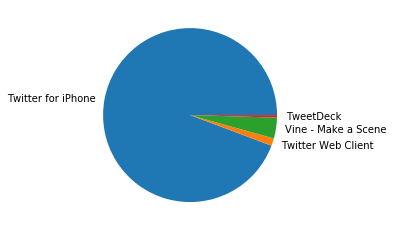

In [118]:
plt.pie([float(v) for v in wt_for.values()], labels=[str(k) for k in wt_for]);

In [85]:
tw_c['timestamp2']=tw_c['timestamp'].dt.to_period('M')

C:\Users\Mustafa\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [101]:
month_using=tw_c['timestamp2'].value_counts().sort_index()

In [102]:
month_using.index

PeriodIndex(['2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04',
             '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10',
             '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
             '2017-05', '2017-06', '2017-07', '2017-08'],
            dtype='period[M]', freq='M')

In [103]:
month_using

2015-11    296
2015-12    370
2016-01    182
2016-02    119
2016-03    129
2016-04     60
2016-05     57
2016-06     89
2016-07     93
2016-08     61
2016-09     68
2016-10     71
2016-11     53
2016-12     55
2017-01     67
2017-02     68
2017-03     52
2017-04     40
2017-05     43
2017-06     48
2017-07     51
2017-08      2
Freq: M, Name: timestamp2, dtype: int64

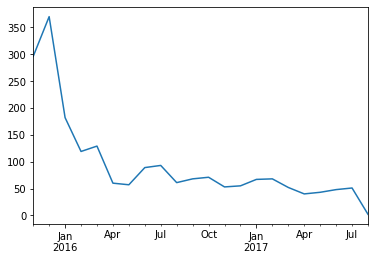

In [104]:
month_using.plot.line()

In [111]:
top_ten=tw_c['name'].value_counts().sort_values(ascending=False)[2:12]

In [119]:
top_ten

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Tucker      9
Penny       9
Lola        8
Winston     8
the         8
Sadie       8
Name: name, dtype: int64

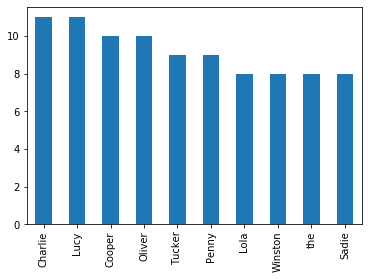

In [112]:
top_ten.plot.bar()

# Reporting 
- **describes wrangling efforts with a 300-600 word in wrangle_report.pdf or wrangle_report.html**
- **Create insights and displays the visualization(s) with a 250-word-minimum in act_report.pdf or act_report.html**